<a href="https://colab.research.google.com/github/surbhigari/House-Price-Predictions-/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/kc_house_data.csv")

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.shape

(21613, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
data.columns.tolist()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [ ]:
data.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
data.nunique()

,0
id,21436
date,372
price,4028
bedrooms,13
bathrooms,30
sqft_living,1038
sqft_lot,9782
floors,6
waterfront,2
view,5


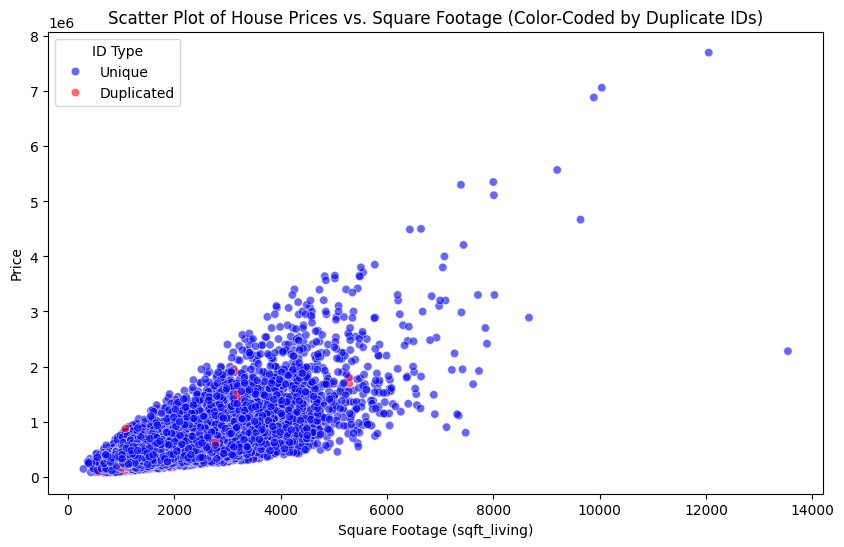

In [ ]:

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'].str[:8], format='%Y%m%d')

# Identify duplicated 'id's
duplicate_ids = data[data.duplicated(subset='id', keep=False)]['id'].unique()

# Create a new column to distinguish between duplicated and unique ids
data['id_color'] = data['id'].apply(lambda x: 'Duplicated' if x in duplicate_ids else 'Unique')

# Create the scatter plot with different colors for duplicated ids
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='sqft_living',
    y='price',
    hue='id_color',
    palette={'Duplicated': 'red', 'Unique': 'blue'},
    alpha=0.6
)

plt.title('Scatter Plot of House Prices vs. Square Footage (Color-Coded by Duplicate IDs)')
plt.xlabel('Square Footage (sqft_living)')
plt.ylabel('Price')
plt.legend(title='ID Type')
plt.show()


<Axes: >

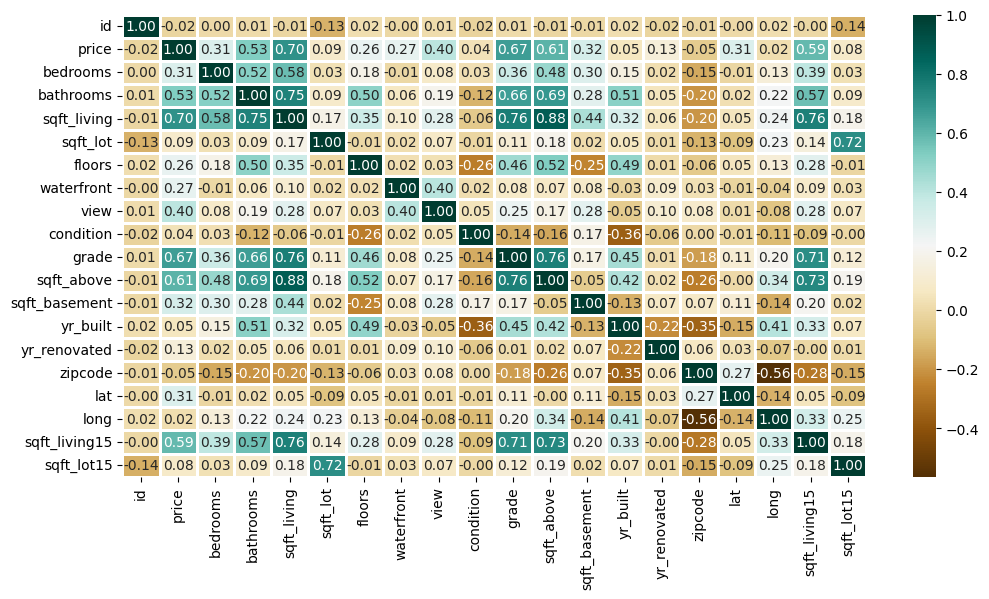

In [ ]:
numerical_data = data.select_dtypes(include =['number'])

plt.figure(figsize =(12,6))
sns.heatmap(numerical_data.corr(),
            cmap= 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/mnt/data/kc_house_data.csv')

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'].str[:8], format='%Y%m%d')

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Handle missing values (if any)
# For simplicity, we will drop rows with missing values.
# You could also impute missing values based on the context.
data.dropna(inplace=True)

# Create new feature: House Age
data['house_age'] = data['date'].dt.year - data['yr_built']

# Drop columns that are not needed or redundant
data.drop(['id', 'date', 'yr_built', 'yr_renovated', 'lat', 'long'], axis=1, inplace=True)

# One-hot encode categorical variables (e.g., 'zipcode')
data = pd.get_dummies(data, columns=['zipcode'], drop_first=True)

# Feature matrix (X) and target variable (y)
X = data.drop('price', axis=1)  # Features
y = data['price']                 # Target variable

# Display the first few rows of the processed dataset
print("Processed DataFrame:")
print(data.head())


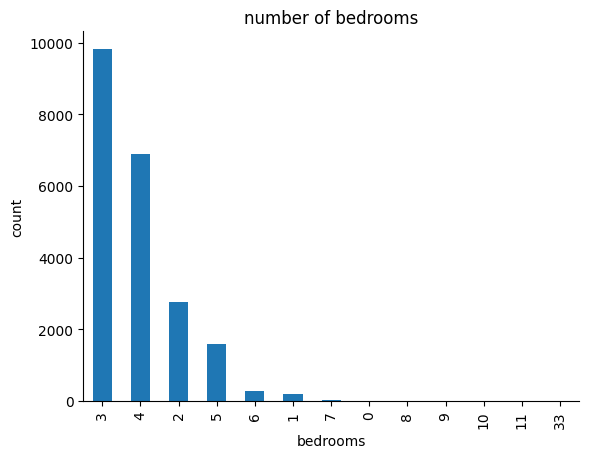

In [ ]:
data['bedrooms'].value_counts().plot(kind ='bar')
plt.title('number of bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('count')
sns.despine()

As we can see from the visualization 3 bedroom houses are most commonly sold followed by 4 bedroom. So how is it useful ? For a builder having this data , He can make a new building with more 3 and 4 bedroom’s to attract more buyers.

<Figure size 1000x1000 with 0 Axes>

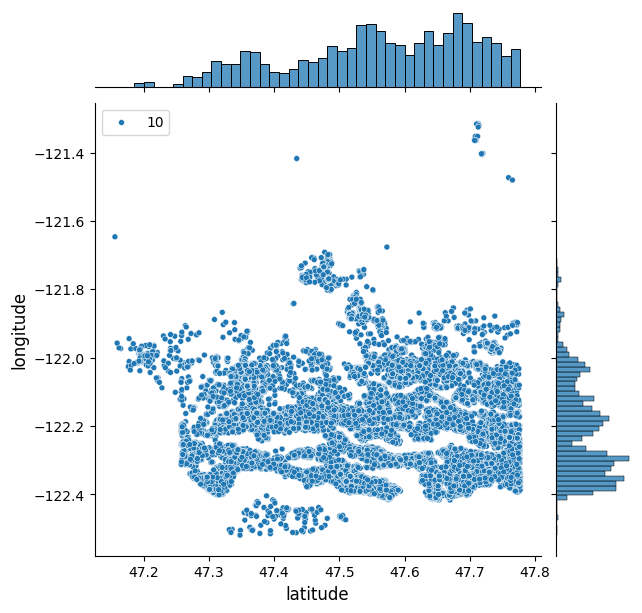

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize = (10,10))
sns.jointplot(x = data.lat.values, y = data.long.values,size = 10)
plt.ylabel('longitude',fontsize = 12)
plt.xlabel('latitude',fontsize = 12)
plt.show()
plt1 = plt.figure()
sns.despine()

For latitude between -47.7 and -48.8 there are many houses , which would mean that maybe it’s an ideal location isn’t it ? But when we talk about longitude we can see that concentration is high between -122.2 to -122.4. Which would mean that most of the buy’s has been for this particular location.

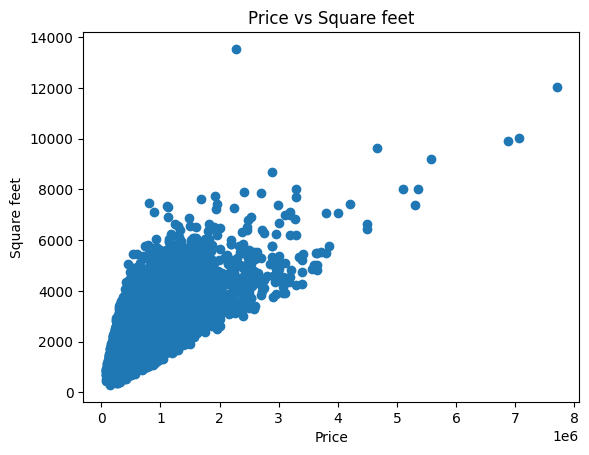

In [ ]:
plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square feet")
plt.xlabel("Price")
plt.ylabel("Square feet")
plt.show()

 we can see that more the living area , more the price though data is concentrated towards a particular price zone , but from the figure we can see that the data points seem to be in linear direction. Thanks to scatter plot we can also see some irregularities that the house with the highest square feet was sold for very less , maybe there is another factor or probably the data must be wrong.

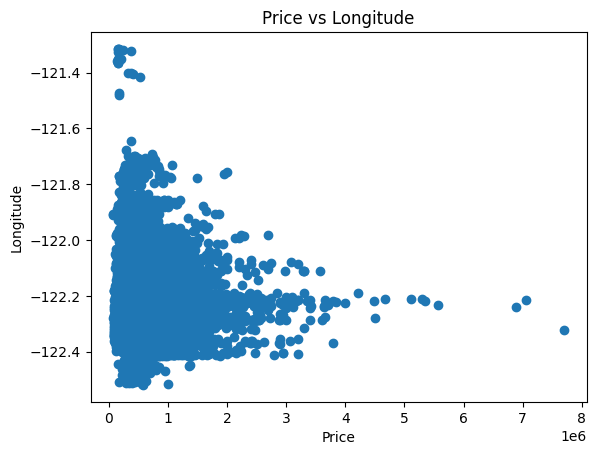

In [ ]:
plt.scatter(data.price,data.long)
plt.title("Price vs Longitude")
plt.xlabel("Price")
plt.ylabel("Longitude")
plt.show()

figure tells us about the location of the houses in terms of longitude and it gives us quite an interesting observation that -122.2 to -122.4 sells houses at much higher amount.

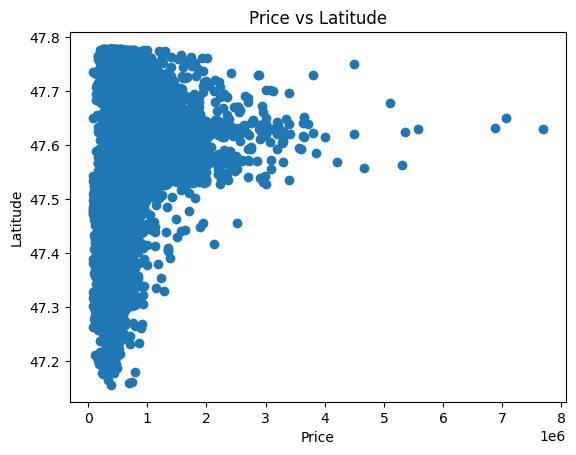

In [ ]:
plt.scatter(data.price,data.lat)
plt.title("Price vs Latitude")
plt.xlabel("Price")
plt.ylabel("Latitude")
plt.show()

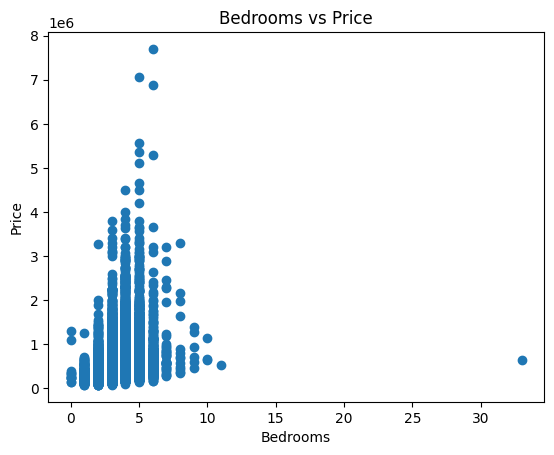

In [ ]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedrooms vs Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

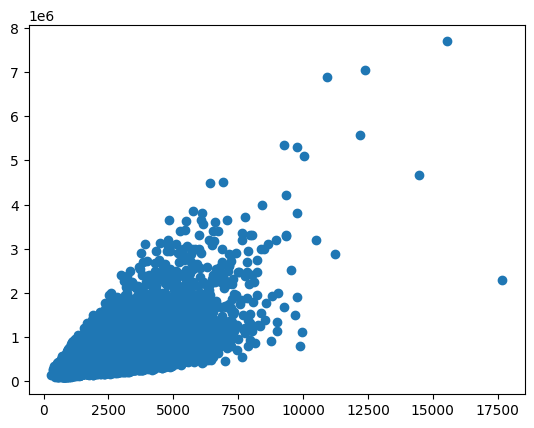

In [ ]:
plt.scatter((data['sqft_living']+ data['sqft_basement']),data['price'])


Text(0, 0.5, 'Price')

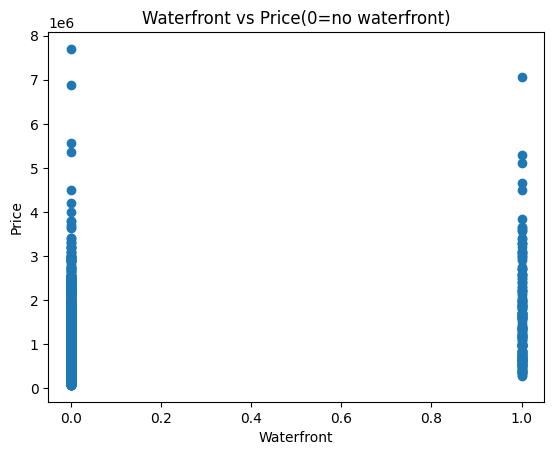

In [ ]:
plt.scatter(data.waterfront,data.price)
plt.title("Waterfront vs Price(0=no waterfront)")
plt.xlabel("Waterfront")
plt.ylabel("Price")

price is independent of waterfront.

In [ ]:
train1 = data.drop(['id','price'],axis = 1)

In [ ]:
train1.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<Axes: xlabel='floors'>

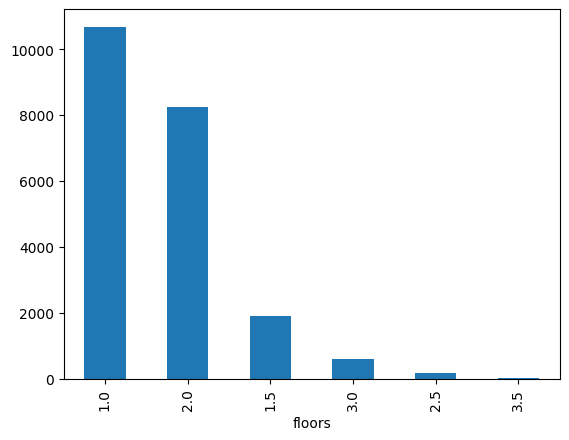

In [ ]:
data.floors.value_counts().plot(kind='bar')

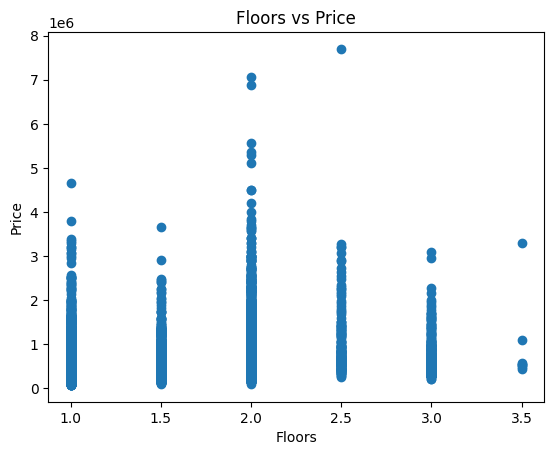

In [ ]:
plt.scatter(data.floors,data.price)
plt.title("Floors vs Price")
plt.xlabel("Floors")
plt.ylabel("Price")
plt.show()


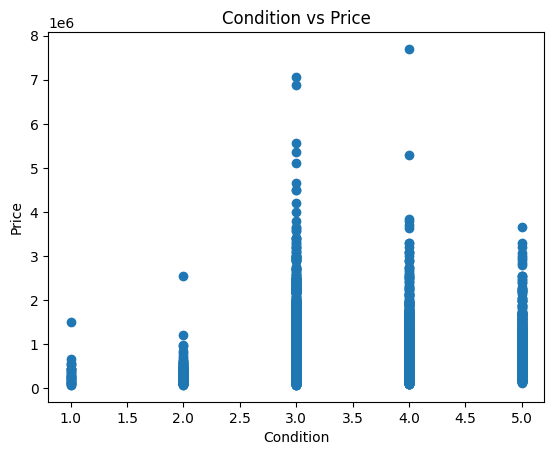

In [ ]:
plt.scatter(data.condition,data.price)
plt.title("Condition vs Price")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()

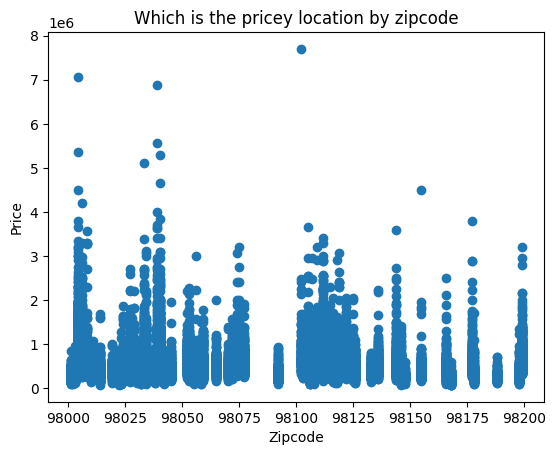

In [ ]:
plt.scatter(data.zipcode,data.price)
plt.title("Which is the pricey location by zipcode")
plt.xlabel("Zipcode")
plt.ylabel("Price")
plt.show()


In [ ]:
from sklearn.preprocessing import OneHotEncoder
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of categorical features:',len(object_cols))

Categorical variables:
['id_color']
No. of categorical features: 1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

#Splitting Dataset into Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
data['house_age'] = data['date'].dt.year - data['yr_built']#Create new feature :House Age
data = pd.get_dummies(data, columns =['zipcode'],drop_first = True) #one -hot encoder categorical variables(including zipcode)
x = data.drop('price',axis = 1) #Features
y = data['price']              #Target variables


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state =42)
#split the dataset into training and testing set( 80% train, 20% test)

In [ ]:
x_train_numeric = x_train.select_dtypes(include = [np.number])
x_test_numeric = x_test.select_dtypes(include = [np.number])

In [ ]:
#Standardizing the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_numeric)
x_test_scaled = scaler.transform(x_test_numeric)

#Using Random Forest Regressor Model

In [ ]:
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(x_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#making predictions on the test set
y_pred = model.predict(x_test_scaled)
print(y_pred,len(y_pred))

[ 369123.5   887589.   1065406.3  ...  284547.39  582474.04  336885.32] 4323


In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Mean Squared Error:{mse:.2f}")
print(f"R^2 Score:{r2:.2f}")


Mean Squared Error:21997524712.62
R^2 Score:0.85


##Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
reg = LinearRegression()

In [ ]:
labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date]
data['date'] = conv_dates
train = data.drop(['id','price'],axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train1,labels,test_size = 0.10)

In [ ]:
reg.fit(x_train,y_train)

ValueError: could not convert string to float: '20150428T000000'

In [ ]:
reg.score(x_test,y_test)

In [ ]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=0.1, loss='ls')
clf.fit(x_train, y_train)
clf.score(x_test, y_test)